In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import optuna
from optuna.storages import RDBStorage
import joblib

In [114]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
submission = pd.read_csv("sample_submission.csv")
train.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314


In [115]:
train = train.drop(columns=["id","Row#"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15000 non-null  float64
 1   honeybee              15000 non-null  float64
 2   bumbles               15000 non-null  float64
 3   andrena               15000 non-null  float64
 4   osmia                 15000 non-null  float64
 5   MaxOfUpperTRange      15000 non-null  float64
 6   MinOfUpperTRange      15000 non-null  float64
 7   AverageOfUpperTRange  15000 non-null  float64
 8   MaxOfLowerTRange      15000 non-null  float64
 9   MinOfLowerTRange      15000 non-null  float64
 10  AverageOfLowerTRange  15000 non-null  float64
 11  RainingDays           15000 non-null  float64
 12  AverageRainingDays    15000 non-null  float64
 13  fruitset              15000 non-null  float64
 14  fruitmass             15000 non-null  float64
 15  seeds              

In [116]:
train.isna().mean()

clonesize               0.0
honeybee                0.0
bumbles                 0.0
andrena                 0.0
osmia                   0.0
MaxOfUpperTRange        0.0
MinOfUpperTRange        0.0
AverageOfUpperTRange    0.0
MaxOfLowerTRange        0.0
MinOfLowerTRange        0.0
AverageOfLowerTRange    0.0
RainingDays             0.0
AverageRainingDays      0.0
fruitset                0.0
fruitmass               0.0
seeds                   0.0
yield                   0.0
dtype: float64

In [117]:
train.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.773500,0.388500,0.284573,0.486751,0.591612,82.245667,49.719033,68.717353,59.282947,28.686927,48.611360,18.804700,0.327261,0.501015,0.445967,36.115335,6022.687345
std,6.644451,0.390162,0.058855,0.147560,0.144194,9.104125,5.519865,7.606632,6.579928,3.180584,5.371006,11.880294,0.166934,0.077379,0.038092,4.121393,1362.796312
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,56.800000,50.200000,24.300000,30.000000,1.000000,0.060000,0.029066,0.217545,22.079199,1637.704020
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418220,33.239806,5124.854900
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506225,0.446518,36.040675,6107.382470
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472271,39.099614,7028.673500
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.960586,0.645475,46.369344,8969.401840


In [118]:
X = train.drop("yield", axis=1)
y = train["yield"]

<Axes: xlabel='yield', ylabel='Count'>

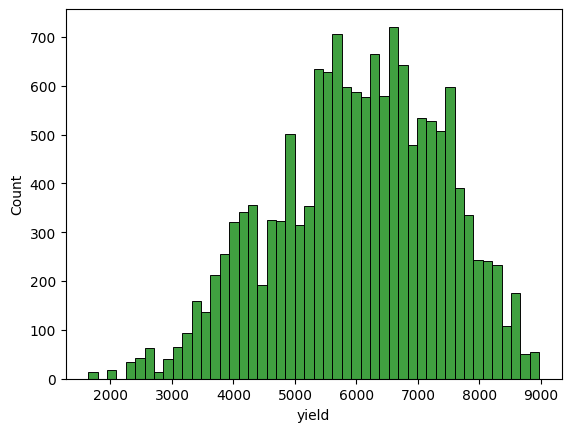

In [70]:
sns.histplot(train["yield"],color="green")

In [71]:
train.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.281753,0.067231,0.024998,-0.063095,0.014498,0.014312,0.014414,0.014497,0.014524,0.014488,0.180171,0.183720,-0.430690,-0.395877,-0.413282,-0.414196
honeybee,0.281753,1.000000,-0.032568,0.021704,-0.024215,0.004320,0.004257,0.004332,0.004324,0.004329,0.004151,0.041167,0.030145,-0.109703,-0.103309,-0.110824,-0.107869
bumbles,0.067231,-0.032568,1.000000,-0.123922,0.174074,-0.010827,-0.010498,-0.010341,-0.010648,-0.010537,-0.010029,-0.084582,-0.081813,0.173703,0.174824,0.180868,0.177281
andrena,0.024998,0.021704,-0.123922,1.000000,0.341832,-0.009516,-0.009735,-0.009959,-0.009926,-0.009756,-0.010254,-0.041906,-0.043045,0.129153,0.111332,0.112469,0.122463
osmia,-0.063095,-0.024215,0.174074,0.341832,1.000000,-0.011543,-0.011632,-0.011405,-0.011527,-0.011476,-0.011951,-0.095874,-0.095683,0.278504,0.256177,0.258819,0.271989
MaxOfUpperTRange,0.014498,0.004320,-0.010827,-0.009516,-0.011543,1.000000,0.999475,0.999327,0.999657,0.999738,0.998303,-0.001452,-0.002587,0.026773,0.149095,0.066244,-0.004252
MinOfUpperTRange,0.014312,0.004257,-0.010498,-0.009735,-0.011632,0.999475,1.000000,0.999438,0.999538,0.999811,0.998444,-0.001652,-0.002748,0.027175,0.149828,0.066773,-0.004008
AverageOfUpperTRange,0.014414,0.004332,-0.010341,-0.009959,-0.011405,0.999327,0.999438,1.000000,0.999456,0.999601,0.998186,-0.001906,-0.003018,0.027631,0.150538,0.067310,-0.003666
MaxOfLowerTRange,0.014497,0.004324,-0.010648,-0.009926,-0.011527,0.999657,0.999538,0.999456,1.000000,0.999868,0.998422,-0.001528,-0.002633,0.027062,0.149717,0.066613,-0.004082
MinOfLowerTRange,0.014524,0.004329,-0.010537,-0.009756,-0.011476,0.999738,0.999811,0.999601,0.999868,1.000000,0.998584,-0.001623,-0.002722,0.026995,0.149552,0.066534,-0.004109


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [73]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [74]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 254.1317672797045


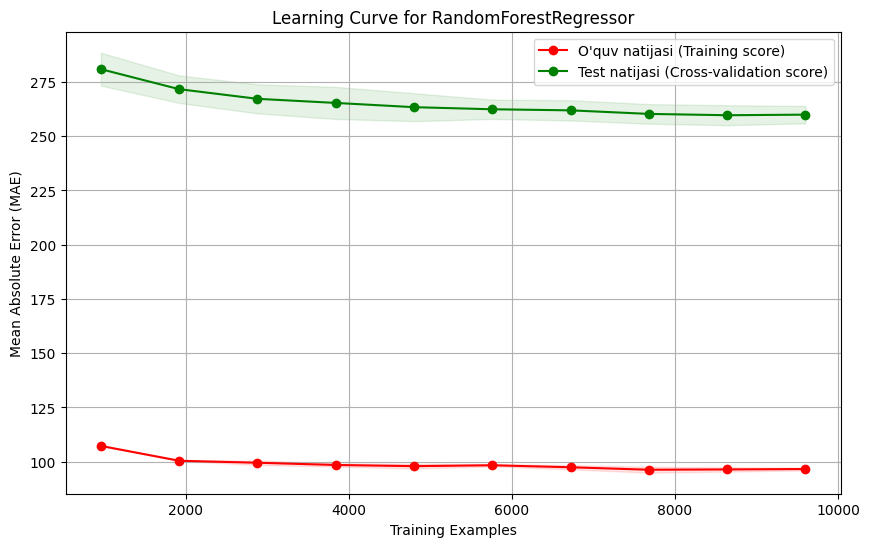

In [75]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# O'rtacha va standart og'ishlarni hisoblash
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curve chizish
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="O'quv natijasi (Training score)")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test natijasi (Cross-validation score)")

# Standart og'ish sohasini qo'shish
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

# Chizma uchun tavsiflar
plt.title("Learning Curve for RandomForestRegressor")
plt.xlabel("Training Examples")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [120]:
X = train.drop(columns=['yield'])
y = train['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):

    # Random Forest parametrlari
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 300, step=50)  # 100, 150, 200, 250, 300
    rf_max_depth = trial.suggest_int("rf_max_depth", 5, 20, step=5)            # 5, 10, 15, 20
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10, step=2)  # 2, 4, 6, 8, 10
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 5, step=1)     # 1, 2, 3, 4, 5

    # Extra Trees parametrlari
    et_n_estimators = trial.suggest_int("et_n_estimators", 100, 300, step=50)        # 100, 150, 200, 250, 300
    et_max_depth = trial.suggest_int("et_max_depth", 5, 20, step=5)                  # 5, 10, 15, 20
    et_min_samples_split = trial.suggest_int("et_min_samples_split", 2, 10, step=2)  # 2, 4, 6, 8, 10
    et_min_samples_leaf = trial.suggest_int("et_min_samples_leaf", 1, 5, step=1)     # 1, 2, 3, 4, 5


    # Har bir bazaviy modelni yaratish
    random_forest = RandomForestRegressor(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf,
        random_state=42
    )
    
    extra_trees = ExtraTreesRegressor(
        n_estimators=et_n_estimators,
        max_depth=et_max_depth,
        min_samples_split=et_min_samples_split,
        min_samples_leaf=et_min_samples_leaf,
        random_state=42
    )

    # Stacking regressor yaratish (faqat ikkita model bilan)
    model = StackingRegressor(
        estimators=[
            ('rf', random_forest),
            ('et', extra_trees)
        ]
    )
    
    # Pipeline yaratish: VarianceThreshold bilan xususiyatlarni tanlash
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', VarianceThreshold(threshold=0.01)),  # past variansli xususiyatlarni olib tashlaydi
        ('model', model)
    ])
    
    # Modelni kross-valiyatsiya bilan o'rganish va MAE hisoblash
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
    mae = -np.mean(scores)
    return mae

In [101]:
study = optuna.create_study(
    storage="sqlite:///optuna.db",  # Qo'shimcha qo'shtirnoqlar olib tashlandi
    study_name="tuning",
    load_if_exists=True,
    direction="minimize"
)
study.optimize(objective, n_trials=30)

[I 2024-11-09 15:51:01,578] Using an existing study with name 'tuning' instead of creating a new one.
[I 2024-11-09 15:52:46,288] Trial 36 finished with value: 249.84335541666437 and parameters: {'rf_n_estimators': 250, 'rf_max_depth': 5, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 3, 'et_n_estimators': 300, 'et_max_depth': 5, 'et_min_samples_split': 6, 'et_min_samples_leaf': 4}. Best is trial 3 with value: 246.8925280603743.
[I 2024-11-09 15:54:05,121] Trial 37 finished with value: 249.78339208444677 and parameters: {'rf_n_estimators': 200, 'rf_max_depth': 5, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 3, 'et_n_estimators': 200, 'et_max_depth': 5, 'et_min_samples_split': 6, 'et_min_samples_leaf': 3}. Best is trial 3 with value: 246.8925280603743.
[I 2024-11-09 16:00:17,426] Trial 38 finished with value: 247.9981860912654 and parameters: {'rf_n_estimators': 300, 'rf_max_depth': 5, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 5, 'et_n_estimators': 300, 'et_max_depth': 2

In [122]:
storage = RDBStorage(url="sqlite:///optuna.db")
study = optuna.create_study(storage=storage, study_name="tuning", load_if_exists=True)

# Har bir sinov natijasini ko'rish
for trial in study.trials:
    print(f"Trial #{trial.number}, Params: {trial.params}, Value: {trial.value}")

[I 2024-11-09 18:20:24,240] Using an existing study with name 'tuning' instead of creating a new one.


Trial #0, Params: {'rf_n_estimators': 150, 'rf_max_depth': 15, 'rf_min_samples_split': 3, 'rf_min_samples_leaf': 1, 'et_n_estimators': 100, 'et_max_depth': 10, 'et_min_samples_split': 2, 'et_min_samples_leaf': 1}, Value: 247.9605547881307
Trial #1, Params: {'rf_n_estimators': 100, 'rf_max_depth': 10, 'rf_min_samples_split': 3, 'rf_min_samples_leaf': 1, 'et_n_estimators': 150, 'et_max_depth': 10, 'et_min_samples_split': 3, 'et_min_samples_leaf': 1}, Value: 247.3720086457007
Trial #2, Params: {'rf_n_estimators': 150, 'rf_max_depth': 10, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 1, 'et_n_estimators': 150, 'et_max_depth': 15, 'et_min_samples_split': 3, 'et_min_samples_leaf': 2}, Value: 249.54887751153032
Trial #3, Params: {'rf_n_estimators': 100, 'rf_max_depth': 10, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 2, 'et_n_estimators': 100, 'et_max_depth': 10, 'et_min_samples_split': 2, 'et_min_samples_leaf': 1}, Value: 246.8925280603743
Trial #4, Params: {'rf_n_estimators': 100, 

In [123]:
# Eng yaxshi parametrlarni chiqarish
best_params = study.best_params
print("Best parameters:", best_params)

Best parameters: {'rf_n_estimators': 150, 'rf_max_depth': 10, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 3, 'et_n_estimators': 100, 'et_max_depth': 10, 'et_min_samples_split': 6, 'et_min_samples_leaf': 2}


In [ ]:
final_random_forest = RandomForestRegressor(
    n_estimators=best_params["rf_n_estimators"],
    max_depth=best_params["rf_max_depth"],
    min_samples_split=best_params["rf_min_samples_split"],
    min_samples_leaf=best_params["rf_min_samples_leaf"],
    criterion="absolute_error",
    random_state=42
)

In [ ]:
final_extra_trees = ExtraTreesRegressor(
    n_estimators=best_params["et_n_estimators"],
    max_depth=best_params["et_max_depth"],
    min_samples_split=best_params["et_min_samples_split"],
    min_samples_leaf=best_params["et_min_samples_leaf"],
    random_state=42
)

In [ ]:
final_model = StackingRegressor(
    estimators=[
        ('rf', final_random_forest),
        ('et', final_extra_trees)
    ]
)

In [ ]:
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', VarianceThreshold(threshold=0.01)),
    ('model', final_model)
])

In [ ]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0.01)),
                ('model',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(criterion='absolute_error',
                                                                      max_depth=10,
                                                                      min_samples_leaf=3,
                                                                      n_estimators=150,
                                                                      random_state=42)),
                                               ('et',
                                                ExtraTreesRegressor(max_depth=10,
                                                                    min_samples_leaf=2,
                                                                    min_samples_split=6,
                                                                    random_state=42))]))])

In [130]:

y_final_pred = final_pipeline.predict(X_test)
final_mae = mean_absolute_error(y_test, y_final_pred)
print("Final MAE:", final_mae)

Final MAE: 240.56434486307595


In [138]:
joblib.dump(final_pipeline,"myModel.pkl")

['myModel.pkl']

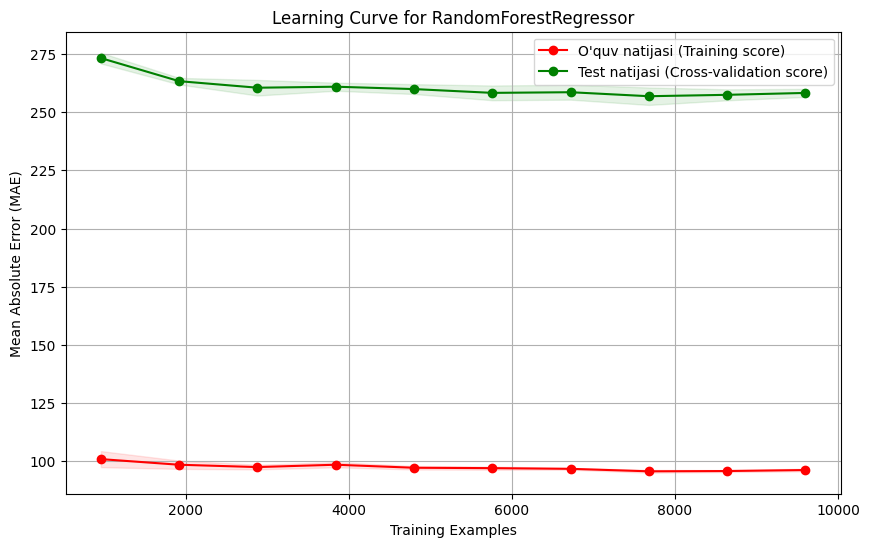

In [131]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# O'rtacha va standart og'ishlarni hisoblash
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curve chizish
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="O'quv natijasi (Training score)")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test natijasi (Cross-validation score)")

# Standart og'ish sohasini qo'shish
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

# Chizma uchun tavsiflar
plt.title("Learning Curve for RandomForestRegressor")
plt.xlabel("Training Examples")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [132]:
X_test = test.drop(columns=['id','Row#'])
test_predictions = final_pipeline.predict(X_test)

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'yield': test_predictions})
submission.to_csv('over_submission.csv', index=False)